In [1]:
import pandas as pd
import json
from pathlib import Path

%pylab inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from collections import (
    Counter,
    defaultdict
)

Populating the interactive namespace from numpy and matplotlib


In [5]:
data_path = Path('/home/jupyter/tutorials/wordnik/data')
user_search_path = data_path/'user_lookup_data'

# Search Data

In [6]:
user_searches = []
for file in user_search_path.iterdir():
    # skip tar extension files
    if str(file).split('.')[1] == 'tar':
        continue
    with open(file) as f:
        user_searches.append(json.loads(f.read()))

In [7]:
full_user_searches = []

for us in user_searches:
    full_user_searches.extend(us)

In [8]:
search_strings = []

for us in full_user_searches:
    word_list = [search['wordstring'].lower() for search in us['recentLookupCount']]
    search_strings.extend(word_list)

In [9]:
counts = Counter(search_strings)

In [10]:
search_tuples = []
for us in full_user_searches:
    search_tuples.extend([
        (us['_id'], search['wordstring'].lower().replace("\t", "").strip()) 
        for search in us['recentLookupCount'] 
    ])

In [11]:
search_df = pd.DataFrame(search_tuples, columns=['user_id', 'word'])
search_df['count'] = 1

search_df = search_df.groupby(['user_id', 'word'])['count'].sum()\
                     .to_frame().reset_index()

In [12]:
search_df['count_words'] = search_df.groupby(['word'])['user_id'].transform('count')
search_df['count_users'] = search_df.groupby(['user_id'])['word'].transform('count')

In [13]:
cnts = search_df['count'].value_counts().to_frame()
cnts['total_sum'] = cnts['count'].sum()
cnts['cum_sum'] = cnts['count'].cumsum()
cnts['pct'] = cnts['cum_sum'] / cnts['total_sum'] * 100
cnts.head(10)

,count,total_sum,cum_sum,pct
1,1216845,1475950,1216845,82.444866
2,182646,1475950,1399491,94.819675
3,43369,1475950,1442860,97.758054
4,16867,1475950,1459727,98.900844
5,6749,1475950,1466476,99.358108
6,3530,1475950,1470006,99.597276
7,1730,1475950,1471736,99.714489
8,1178,1475950,1472914,99.794302
9,741,1475950,1473655,99.844507
10,539,1475950,1474194,99.881026


In [14]:
search_df = search_df[search_df['count_words'] > 1].copy()
search_df = search_df[search_df['count_users'] > 1].copy()

In [15]:
search_df['count'] = search_df['count'].apply(lambda x: x if x <= 10 else 10)

In [16]:
from fastai import *
from fastai.collab import *

In [20]:
data = CollabDataBunch.from_df(search_df, seed=42, pct_val=0.3,
                               user_name='user_id', item_name='word', rating_name='count')

In [21]:
learn = collab_learner(data, n_factors=50)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2, .001)

epoch,train_loss,valid_loss
1,0.948538,0.957627
2,0.867293,0.864070


In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


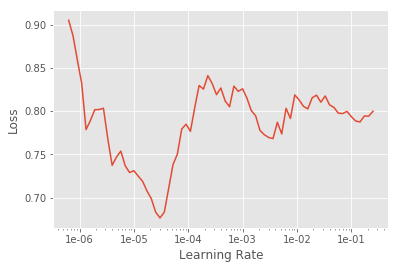

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, 1e-5)

epoch,train_loss,valid_loss
1,0.778496,0.862858
2,0.763138,0.862306


In [ ]:
len(w2v)

In [ ]:
w = np.array(learn.model.i_weight.weight)

In [ ]:
import pickle

In [ ]:
pickle.dump(w, open('weight_matrix.pkl', 'wb'))

In [ ]:
pickle.dump(word2index, open('w2i.pkl','wb'))
pickle.dump(idx2word, open('i2w.pkl','wb'))

In [ ]:
u_class, i_class = learn.data.classes.values()

word2index = {w:i for i,w in enumerate(i_class)}
idx2word = {i:w for i,w in enumerate(i_class)}

In [ ]:
np.dot()

In [ ]:
idx2word[34179]

In [ ]:
counts.most_common(100)

In [ ]:
word = 'jejune'
[idx2word[i] for i in np.argsort(np.dot(w, w[word2index[word]]))[::-1]][1:10]

In [ ]:
word2index['help']

In [ ]:
len(i_class)

In [ ]:
w

In [ ]:
learn.model.

In [ ]:
w.shape

In [ ]:
sys.getsizeof(w) / 1e9

In [ ]:
weights = learn.weight(np.array(search_df['word'].unique()), is_item=True)

In [ ]:
w2v = dict()
err = 0 

for w in search_df['word'].unique():
    try:
        w2v[w] = to_np(learn.weight([w], is_item=True))
    except KeyError:
        err += 1
        continue

In [ ]:
to_np(learn.weight(['help'], is_item=True))[0]

In [ ]:
learn.weight(['slub'], is_item=True)

In [ ]:
top_words = [c[0] for c in counts.most_common(100)]

In [ ]:
b = learn.bias(top_words, is_item=True)

In [ ]:
np.array(top_words)[np.argsort(to_np(b))]

In [ ]:
search_df.shape

In [ ]:
search_df['word'].nunique()

In [ ]:
search_df.head()

In [ ]:
top_n = 100
top_words = search_df.groupby('word')['user_id'].count().sort_values(ascending=False).index[:top_n]
top_users = search_df.groupby('user_id')['word'].count().sort_values(ascending=False).index[:top_n]

In [ ]:
search_df.groupby('user_id')['word'].count().sort_values(ascending=False)

In [ ]:
top_df = search_df[(search_df['user_id'].isin(top_users) & (search_df['word'].isin(top_words)))]

In [ ]:
top_df.shape

In [ ]:
p = search_df.pivot('user_id', 'word', 'dummy').fillna(0)

In [ ]:
sys.getsizeof(search_df.pivot('user_id', 'word', 'dummy').fillna(0)) / 1e9

In [ ]:
sns.heatmap(top_df.pivot('user_id', 'word', 'dummy').fillna(0))

In [ ]:
search_df.shape

In [ ]:
search_df.sample(15)

In [ ]:
search_df['user_id'].nunique()

In [ ]:
search_df['word'].nunique()

In [ ]:
search_df.shape

In [ ]:
full_user_searches[0]

In [ ]:
counts.most_common(100)

In [ ]:
len(search_strings)

In [ ]:
len(full_user_searches)

In [ ]:
n_searches = np.array(sorted([us['recentLookups'] for us in full_user_searches]))

In [ ]:
import math
pct = .5
idx = math.floor(len(n_searches) * pct)
n_searches[idx]

In [ ]:
import pandas as pd

In [ ]:
sns.distplot(n_searches)

# List Data

In [ ]:
list_path = data_path/'data-06Jan2019'/'word_lists-06Jan2019'
json_string = "[" + ','.join([l.strip() for l in open(list_path).readlines()]) + "]"

In [ ]:
list_data = json.loads(json_string)

In [ ]:
Counter([type(ld['numberWordsInList']) for ld in list_data])

In [ ]:
list_len = [int(ld['numberWordsInList']['$numberLong']) 
            for ld in list_data if isinstance(ld['numberWordsInList'], dict)]
list_len = np.array(list_len)

In [ ]:
sns.distplot(list_len)

In [ ]:
word_list_path = data_path/'data-06Jan2019'/'listed_words-06Jan2019'
json_string = "[" + ','.join([l.strip() for l in open(word_list_path).readlines()]) + "]"
wl_data = json.loads(json_string)
json_string = None

In [ ]:
word_lists = defaultdict(list)

for wld in wl_data:
    word_lists[int(wld['wordListId']['$numberLong'])].append(wld['lcword'])

In [ ]:
len(word_lists.keys())

In [ ]:
word_lists = {list_id:set(words_in_list) for list_id, words_in_list in word_lists.items()}

In [ ]:
word_lists[170]

In [ ]:
len(word_lists[170])

In [ ]:
def jaccard_sim(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

In [ ]:
from multiprocessing import Pool

In [ ]:
list_id = np.random.choice(list(word_lists.keys()), 1)[0]

In [ ]:
sims = {}
for i,lid in enumerate(word_lists.keys()):
    if lid != list_id:
        sims[lid] = jaccard_sim(word_lists[list_id], word_lists[lid])

In [ ]:
word_lists[list_id]

In [ ]:
pd.Series(sims).sort_values(ascending=False)

In [ ]:
word_lists[570005]

In [ ]:
word_lists[list_id]